<a href="https://colab.research.google.com/github/nikitakandpal/ML-projects/blob/main/Happiness_Index_grp_asgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('happiness_data.csv')

In [ ]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1949
Number of columns: 11


In [ ]:
print(df.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0        

In [ ]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Continuous valued attributes/features:")
print(continuous_features)

Continuous valued attributes/features:
Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical attributes:")
print(categorical_features)


Categorical attributes:
Index(['Country name'], dtype='object')


In [ ]:
statistics = df.describe()
print(statistics)

              year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.25800

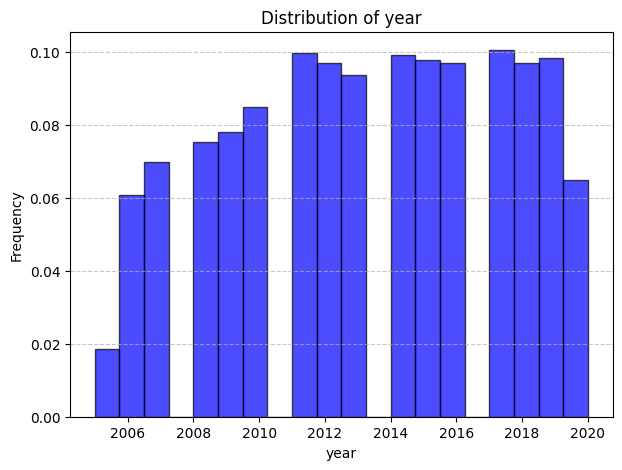

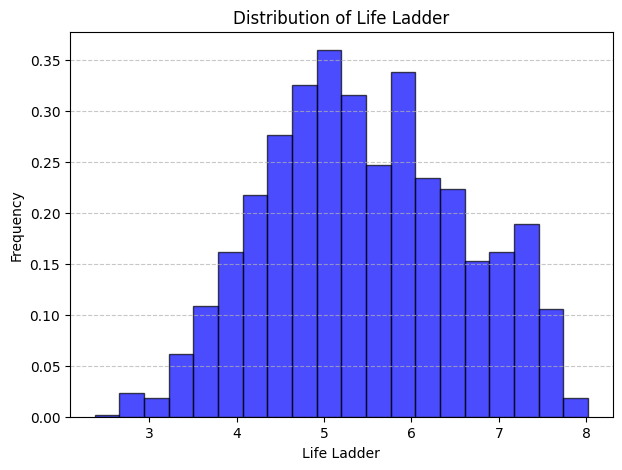

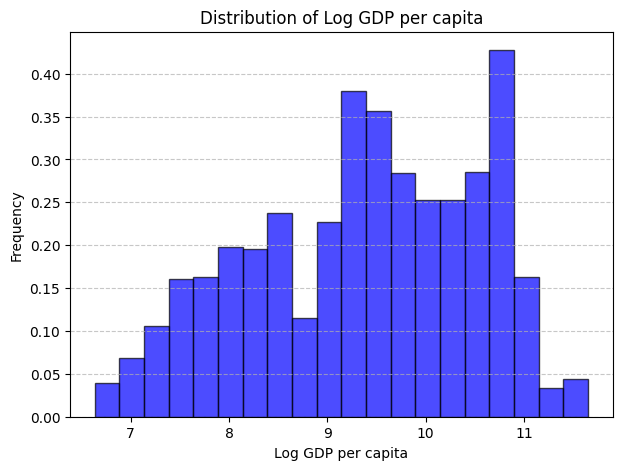

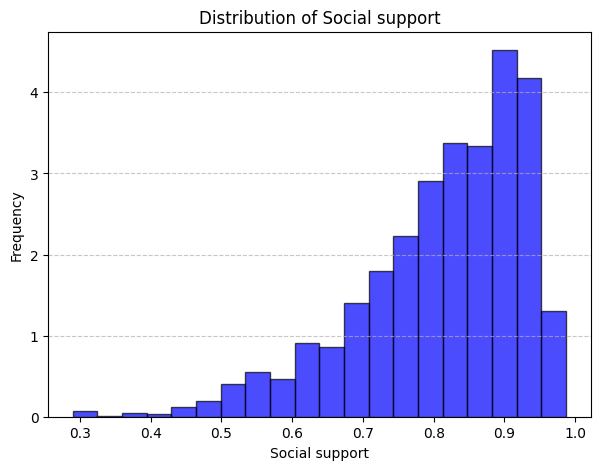

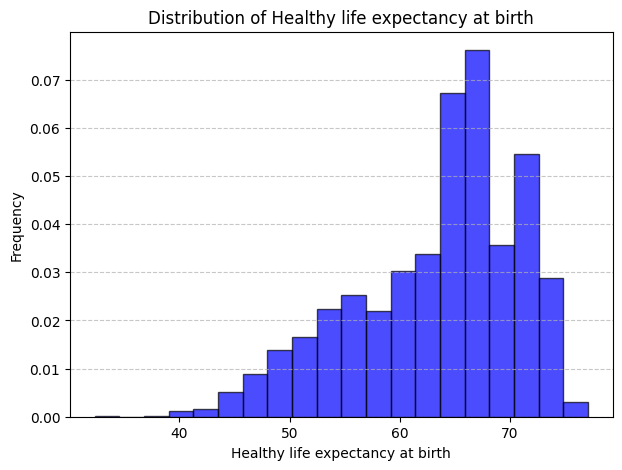

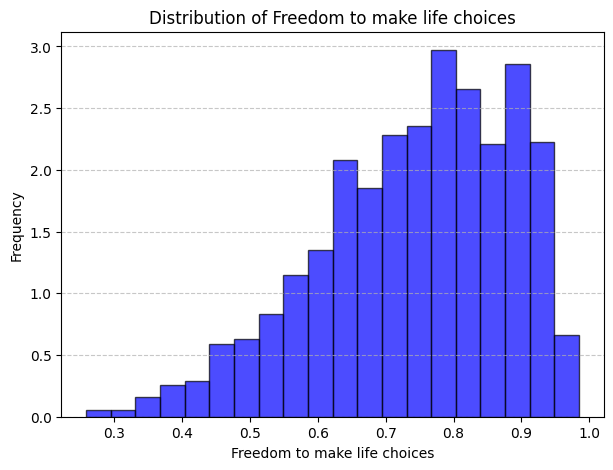

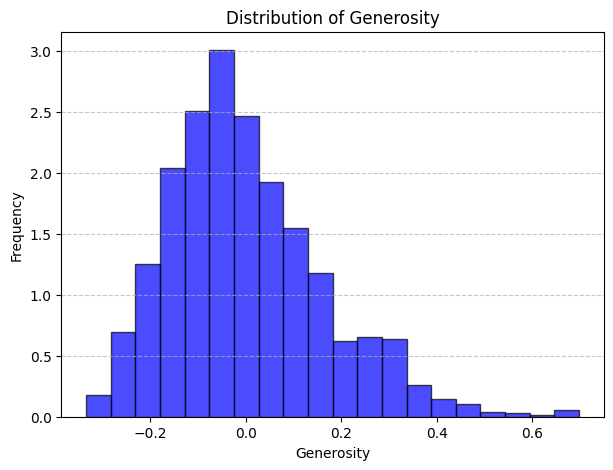

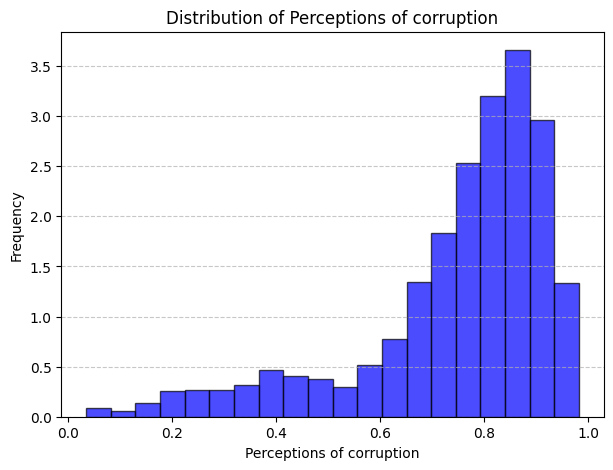

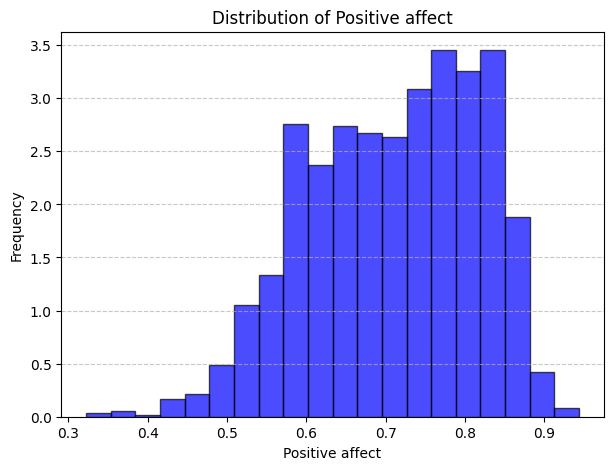

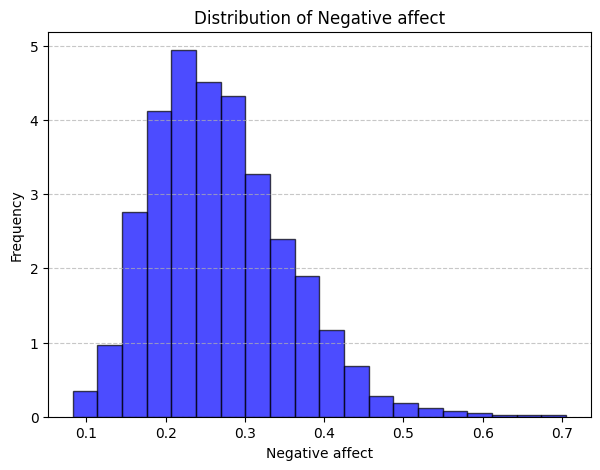

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(7, 5))
    plt.hist(df[column], bins=20, density=True, alpha=0.7, color='b', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

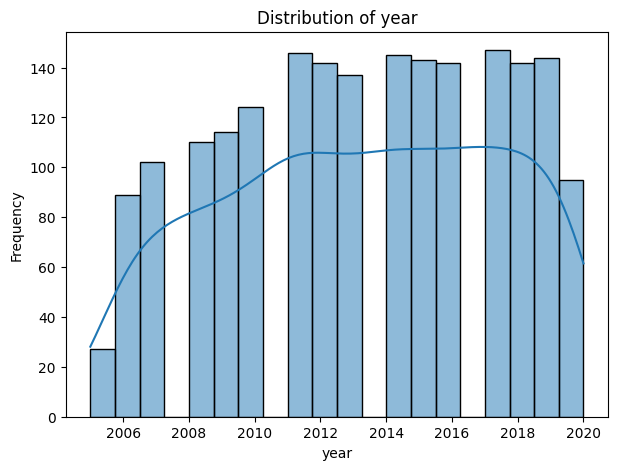

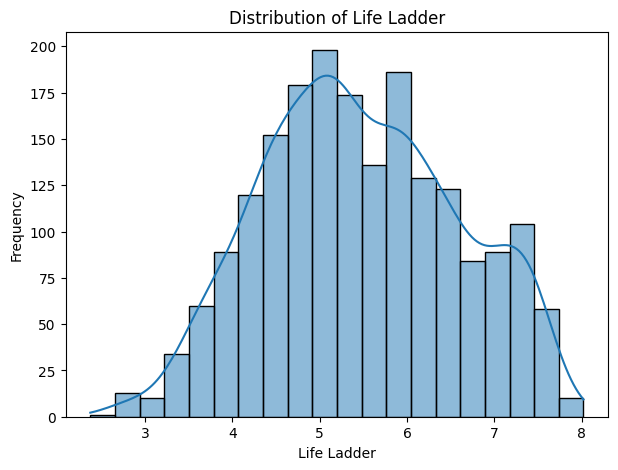

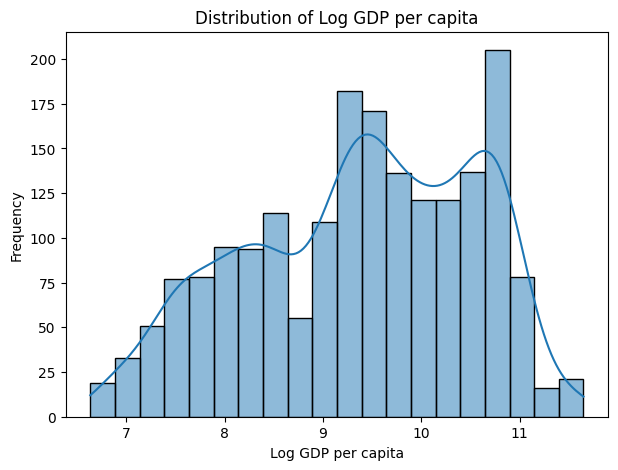

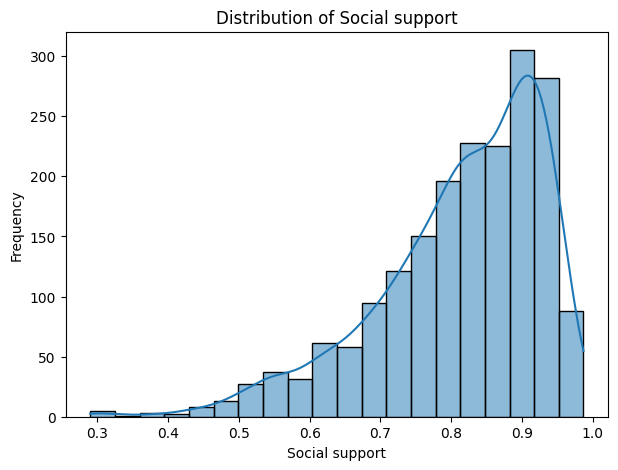

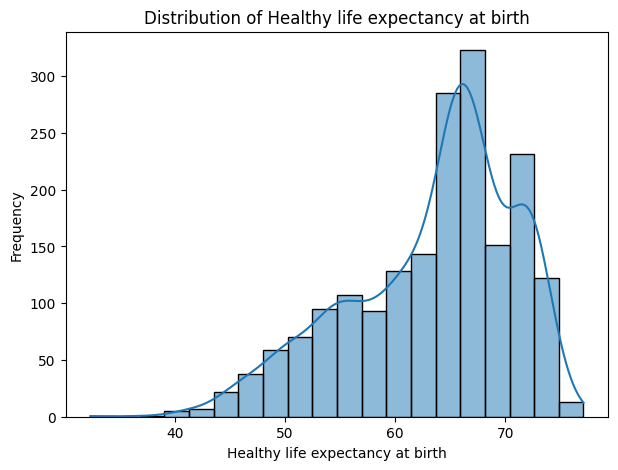

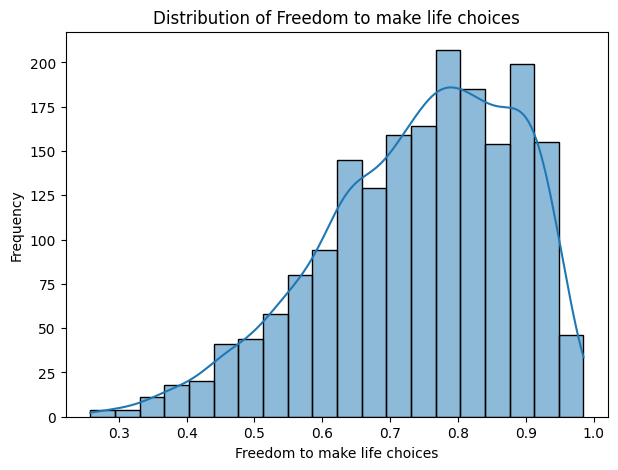

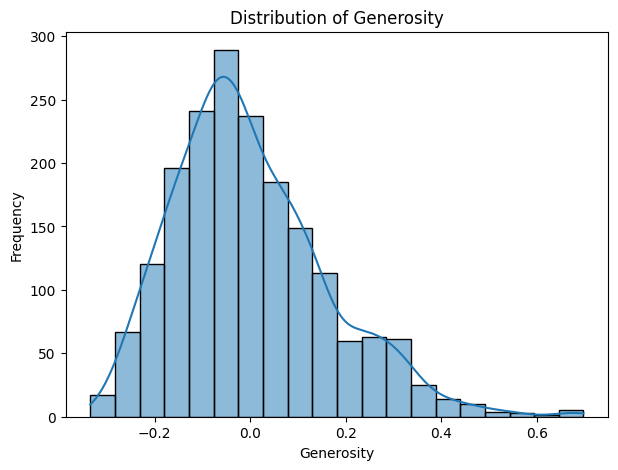

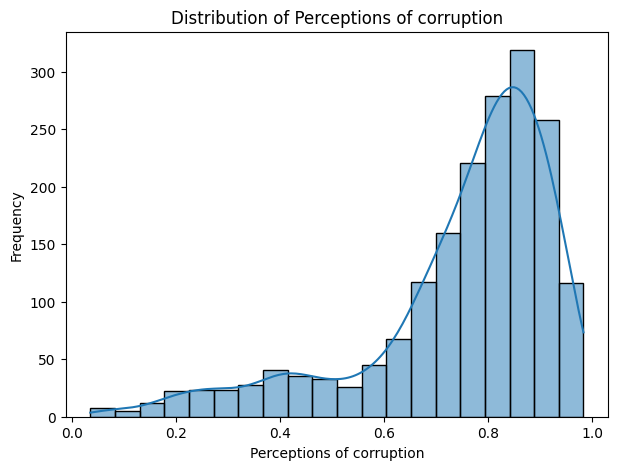

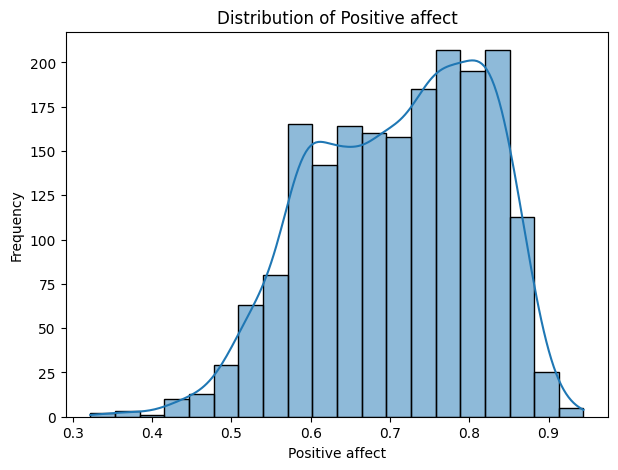

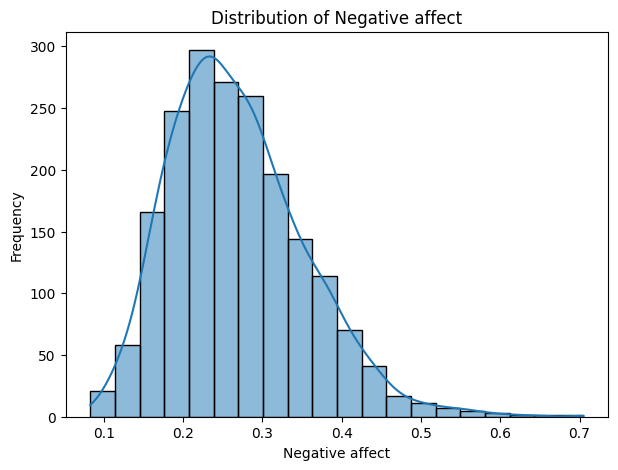

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(7, 5))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
correlation_matrix = df.corr(method='pearson')

<ipython-input-29-2663855e16a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


In [ ]:
def plot(attribute1, attribute2):
    selected_attributes = [attribute1, attribute2]
    plotted_pairs = set()
    for attr1 in selected_attributes:
        for attr2 in selected_attributes:
            if attr1 != attr2 and (attr1, attr2) not in plotted_pairs and (attr2, attr1) not in plotted_pairs:
                plt.figure(figsize=(40, 40))
                plt.scatter(df[attr1], df[attr2], alpha=0.5)
                plt.title(f'Scatter Plot: {attr1} vs. {attr2}')
                plt.xlabel(attr1)
                plt.ylabel(attr2)
                plt.grid(True)
                plt.show()
                plotted_pairs.add((attr1, attr2))


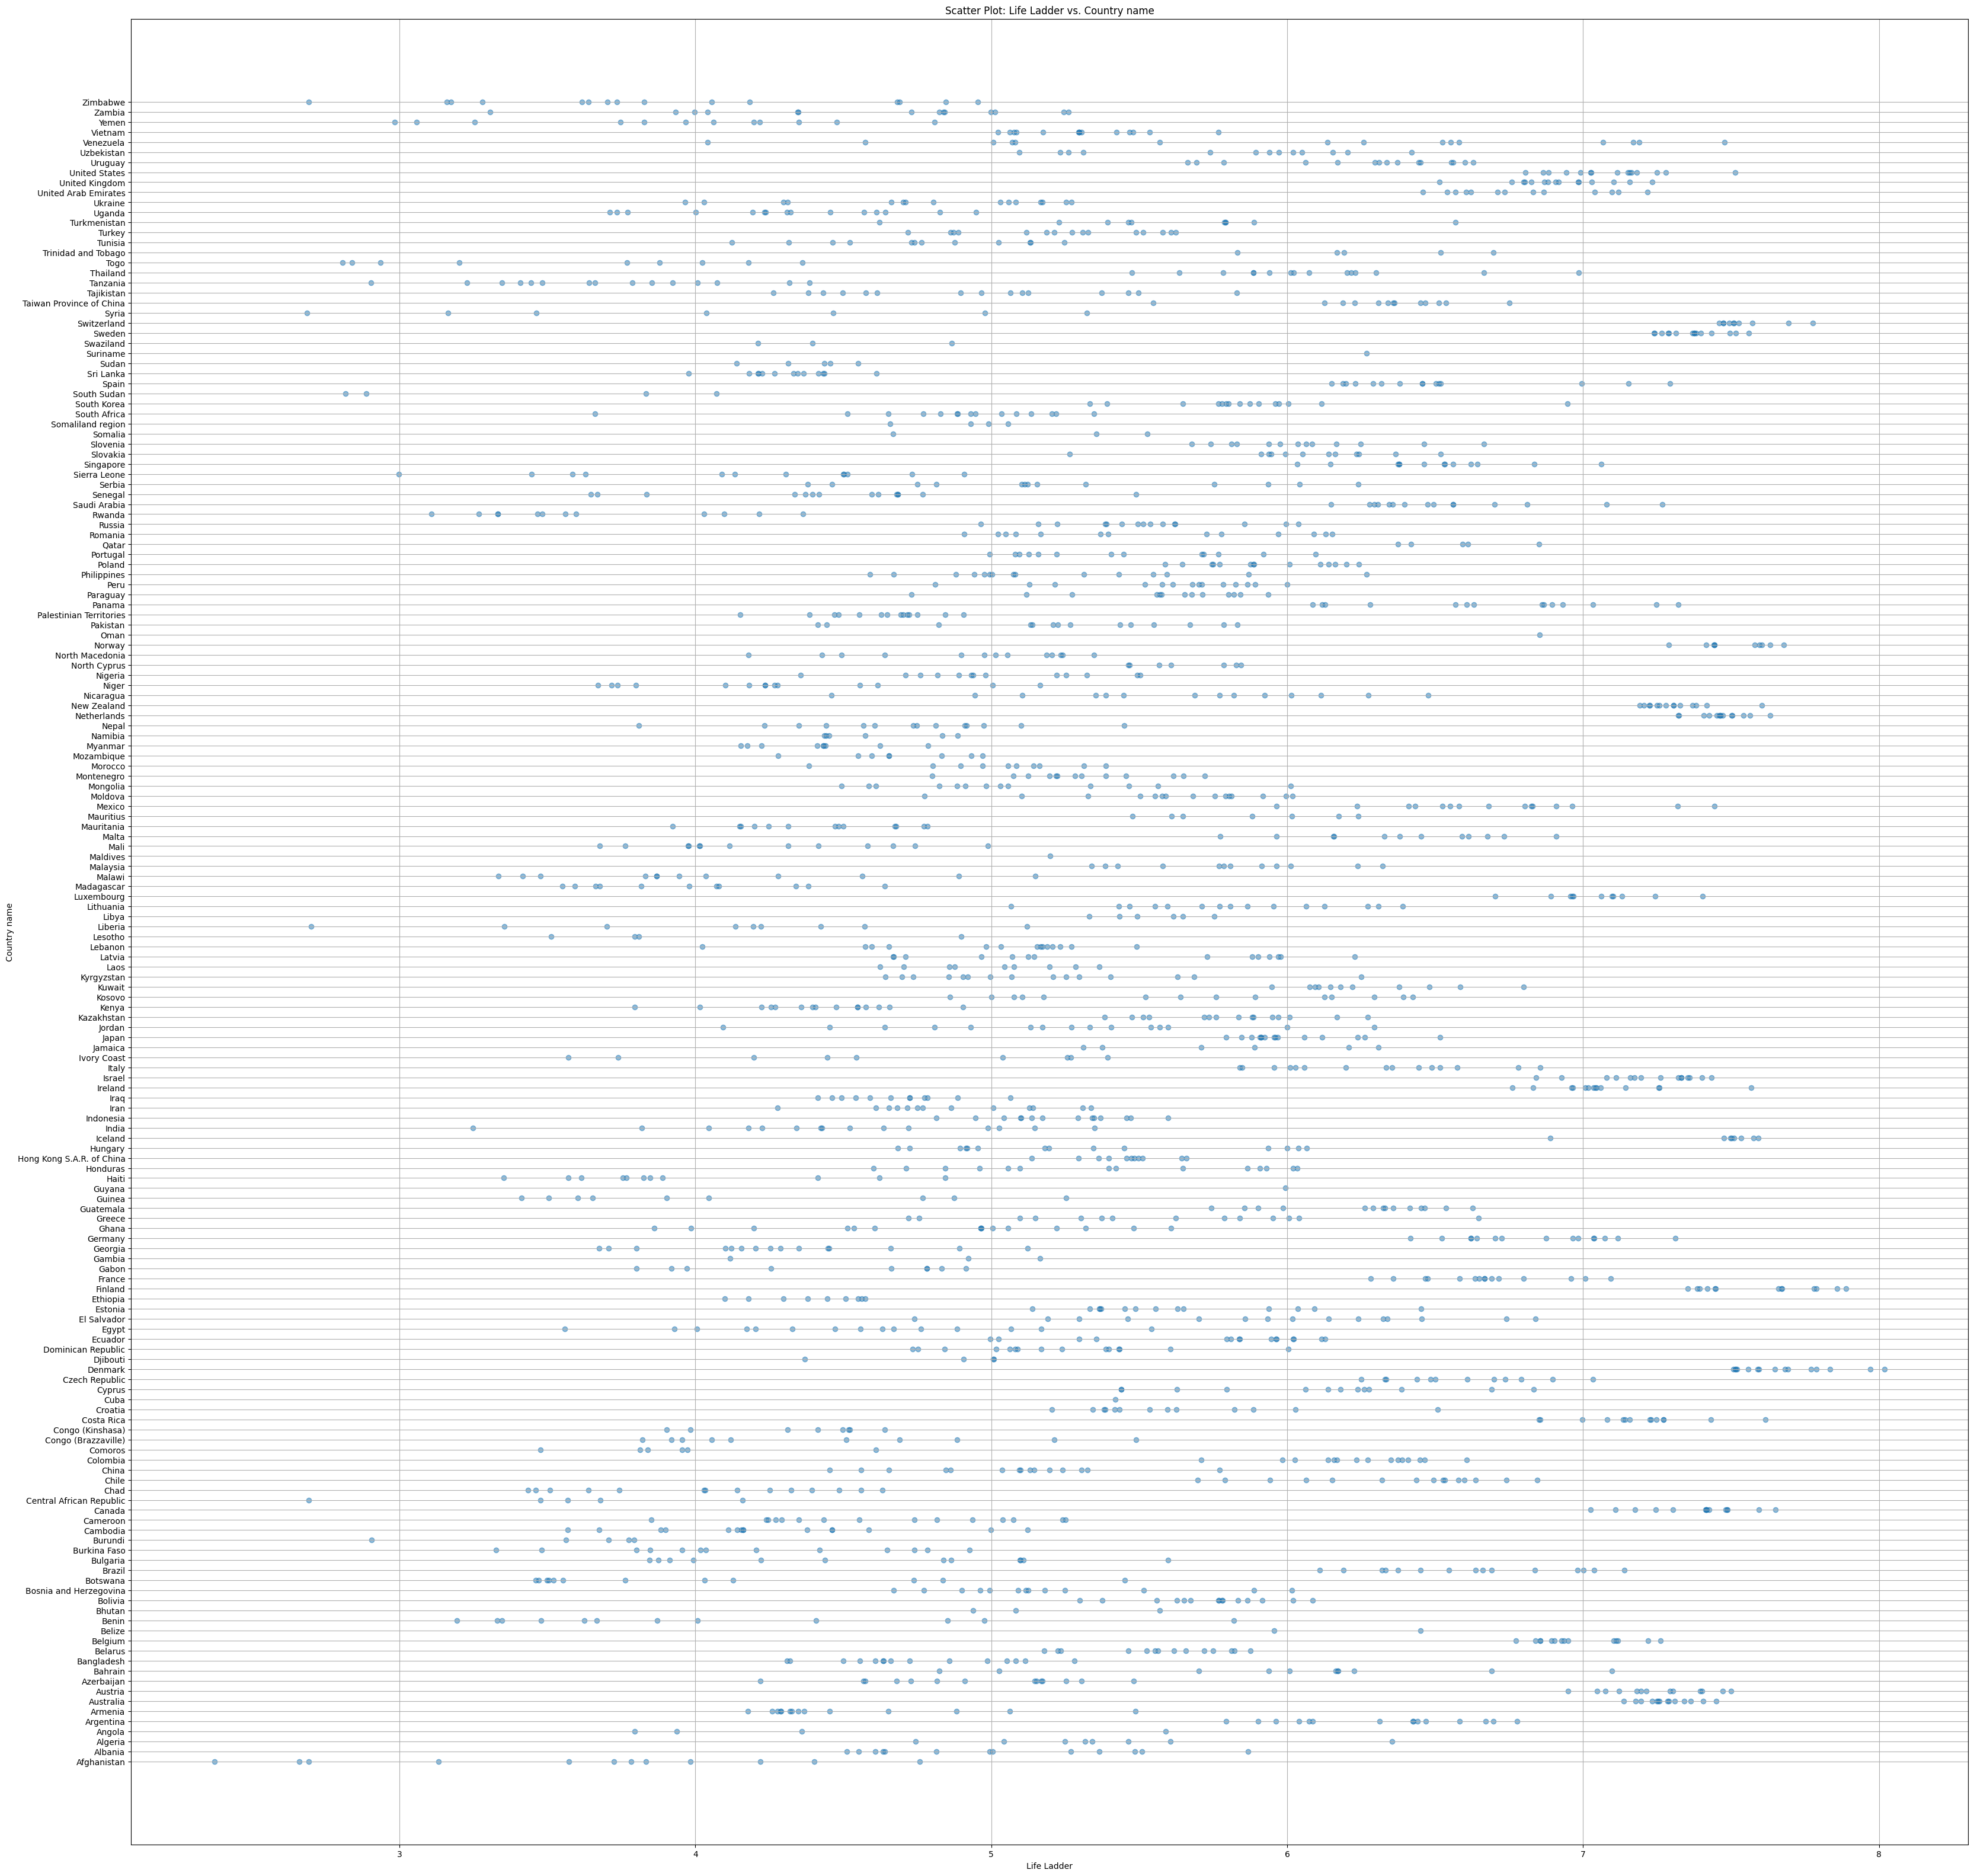

In [ ]:
plot('Life Ladder', 'Country name')

In [ ]:
X = df[['year', 'Log GDP per capita', 'Social support',
        'Healthy life expectancy at birth', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption', 'Positive affect',
        'Negative affect']]

y = df['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (1559, 9) (1559,)
Test set shape: (390, 9) (390,)


In [ ]:
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (1559, 9)
Test set shape: (390, 9)


In [ ]:
df["year"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005])

In [ ]:
correlation_matrix = df.corr(method='pearson')

<ipython-input-24-2663855e16a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


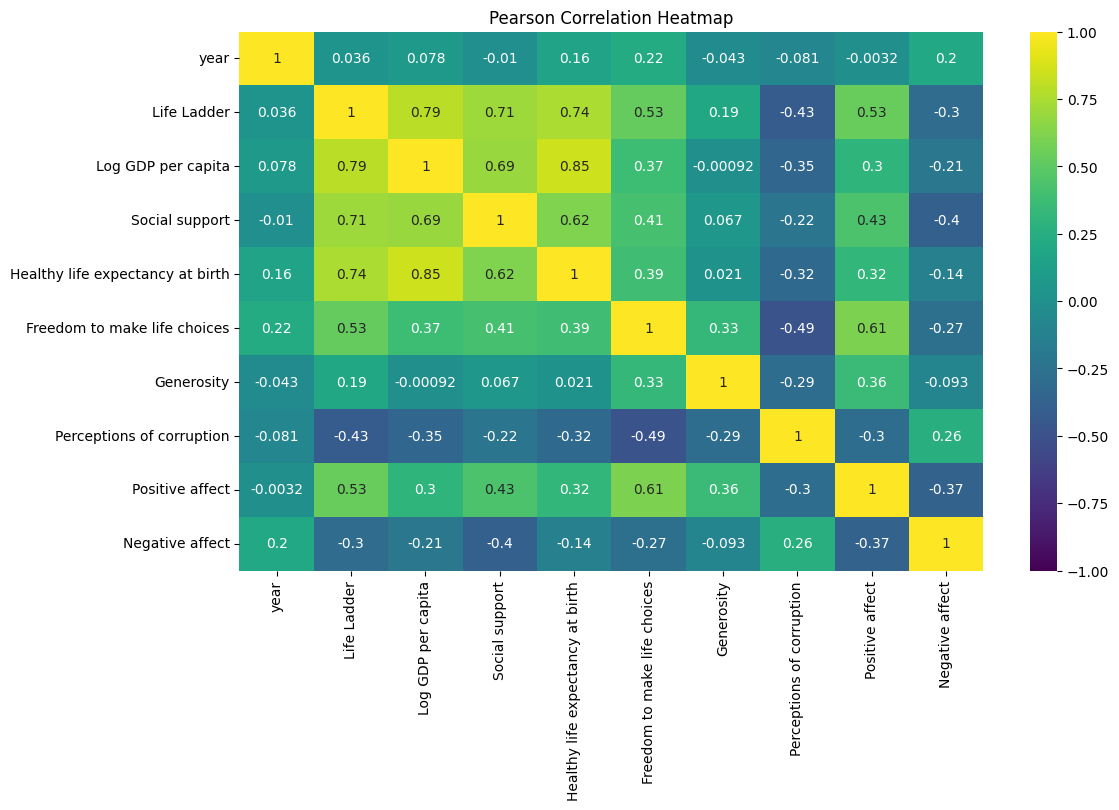

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

<ipython-input-26-eda1896f85a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1,cmap = 'viridis')


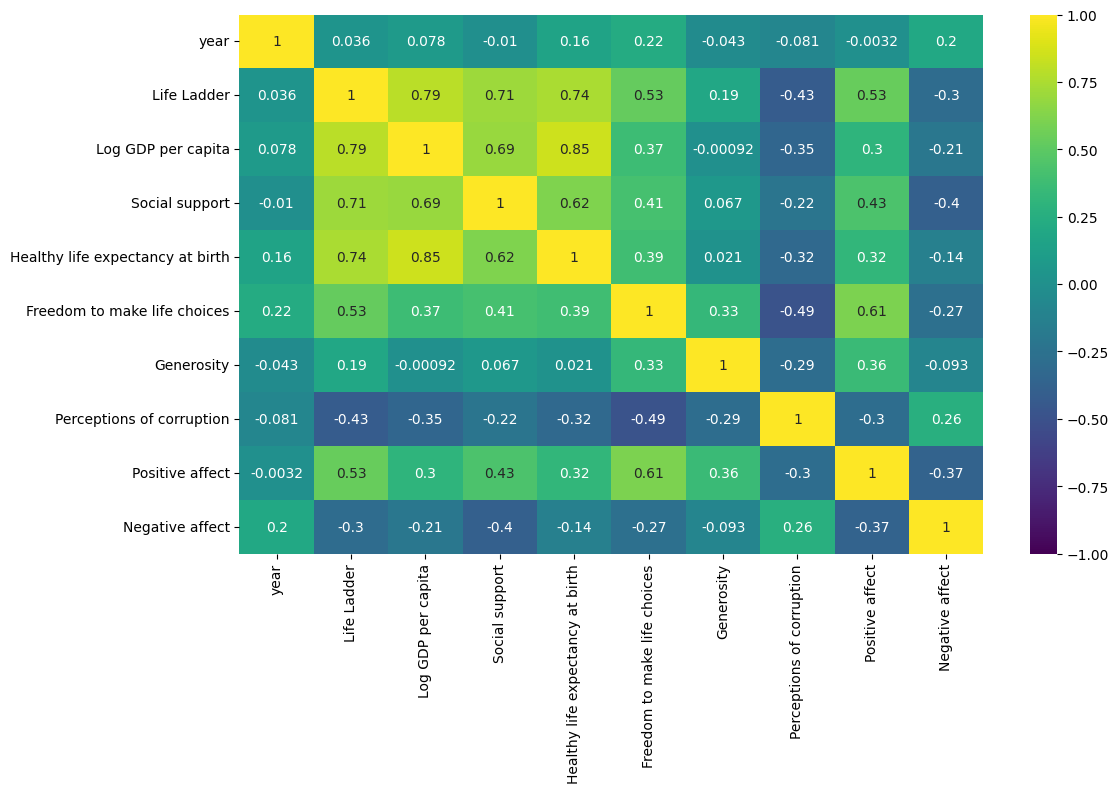

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1,cmap = 'viridis')
plt.show()

In [ ]:
max_value = df['Life Ladder'].max()
print(f"Maximum value in 'ColumnName': {max_value}")

# Minimum value
min_value = df['Life Ladder'].min()
print(f"Minimum value in 'ColumnName': {min_value}")

Maximum value in 'ColumnName': 8.019
Minimum value in 'ColumnName': 2.375


In [ ]:
#max_value = df['Country name','Life Ladder'].max()
#print(f"Maximum value in 'ColumnName': {max_value}")

# Minimum value
#min_value = df['ColumnName'].min()
#print(f"Minimum value in 'ColumnName': {min_value}")

KeyError: ignored

In [ ]:
df2=df.loc[df['Life Ladder'].idxmax()]
df2


Country name                        Denmark
year                                   2005
Life Ladder                           8.019
Log GDP per capita                   10.851
Social support                        0.972
Healthy life expectancy at birth       69.6
Freedom to make life choices          0.971
Generosity                              NaN
Perceptions of corruption             0.237
Positive affect                        0.86
Negative affect                       0.154
Name: 449, dtype: object

In [ ]:
df2=df.loc[df['Life Ladder'].idxmin()]
df2


Country name                        Afghanistan
year                                       2019
Life Ladder                               2.375
Log GDP per capita                        7.697
Social support                             0.42
Healthy life expectancy at birth           52.4
Freedom to make life choices              0.394
Generosity                               -0.108
Perceptions of corruption                 0.924
Positive affect                           0.351
Negative affect                           0.502
Name: 11, dtype: object

In [ ]:
denmark_data = df[df["Country name"] == "Denmark"]

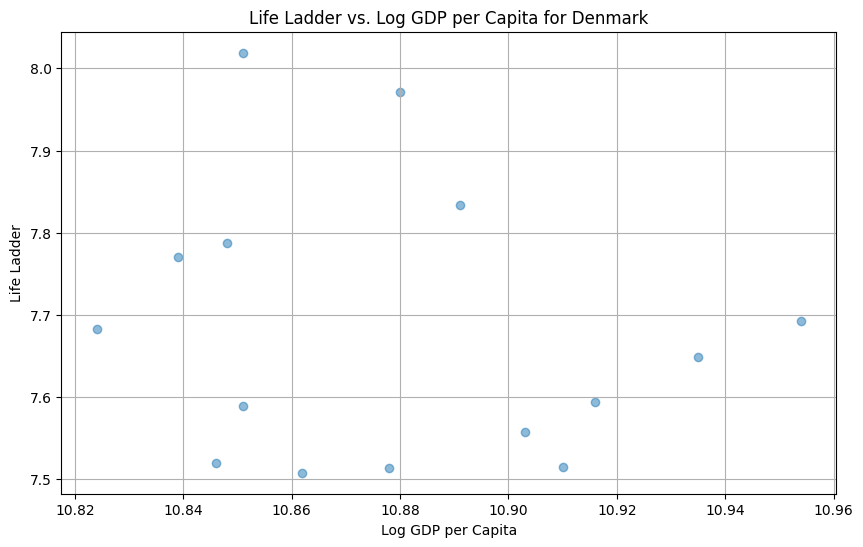

In [ ]:
life_ladder = denmark_data['Life Ladder']
log_gdp = denmark_data['Log GDP per capita']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(log_gdp, life_ladder, alpha=0.5)
plt.title('Life Ladder vs. Log GDP per Capita for Denmark')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.grid(True)

# Show the plot
plt.show()

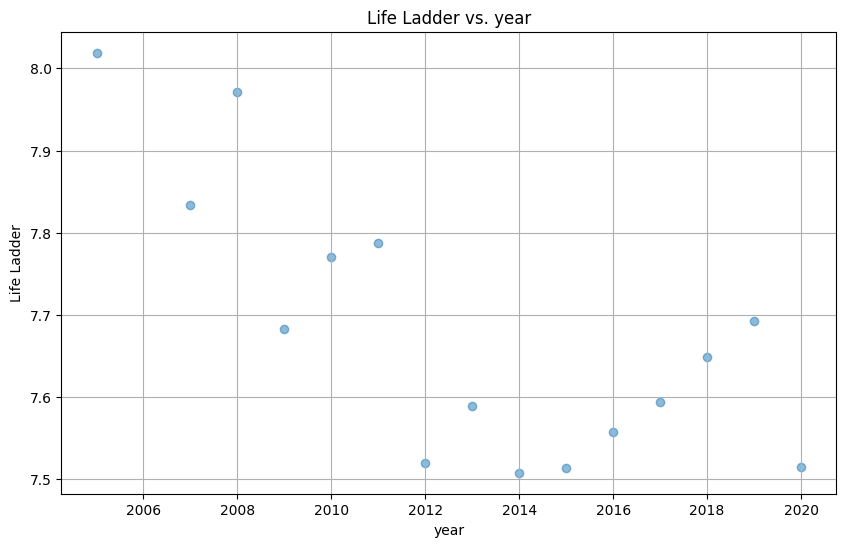

In [ ]:
life_ladder = denmark_data['Life Ladder']
year = denmark_data['year']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(year, life_ladder, alpha=0.5)
plt.title('Life Ladder vs. year')
plt.xlabel('year')
plt.ylabel('Life Ladder')
plt.grid(True)

# Show the plot
plt.show()

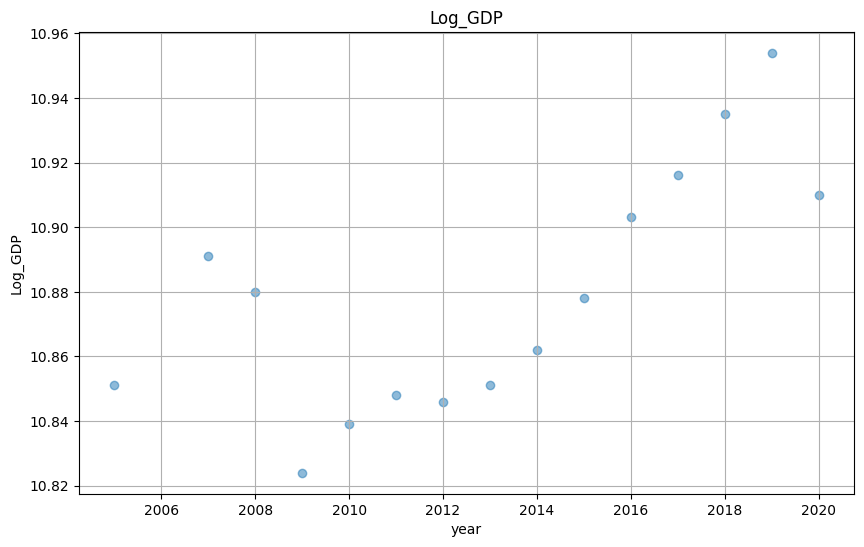

In [ ]:
Log_GDP= denmark_data['Log GDP per capita']
year = denmark_data['year']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(year, Log_GDP, alpha=0.5)
plt.title('Log_GDP')
plt.xlabel('year')
plt.ylabel('Log_GDP')
plt.grid(True)

# Show the plot
plt.show()